In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
df_option = pd.read_pickle("dev_master_stock_info.pkl")

In [3]:
df_option.index =df_option['date']

In [4]:
df = df_option.drop('Date_Only', axis=1)

In [5]:
df_target = pd.DataFrame(df['close'])

In [48]:
df_target['close'] = np.log(df_target['close'])

In [50]:
df_target['close'] = df_target['close'].diff()

In [60]:
df_target  = df_target.bfill()

<Axes: xlabel='date'>

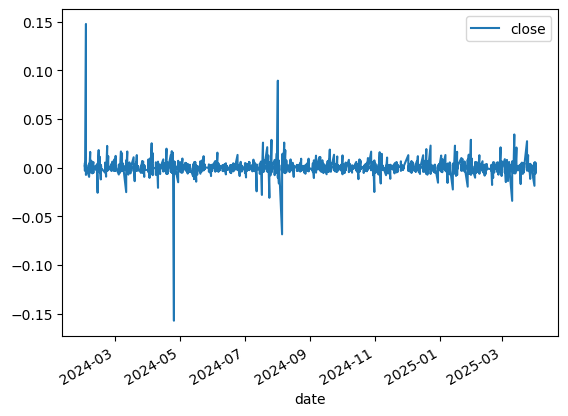

In [64]:
df_target.plot()

## Train Test Split

In [65]:
len(df_target)

113520

Five min candle = 4*12 = 48 (4 hour))

In [66]:
len(df_target)- 48

113472

In [67]:
test_size =48

In [68]:
test_ind = len(df_target)- test_size

In [69]:
train = df_target.iloc[:test_ind]
test = df_target.iloc[test_ind:]

In [70]:
train

,close
date,
2024-02-01 09:30:00-05:00,0.002273
2024-02-01 09:31:00-05:00,0.002273
2024-02-01 09:32:00-05:00,0.002067
2024-02-01 09:33:00-05:00,0.000126
2024-02-01 09:34:00-05:00,0.004897
...,...
2025-04-01 15:07:00-04:00,0.000429
2025-04-01 15:08:00-04:00,-0.000961
2025-04-01 15:09:00-04:00,-0.001065


In [71]:
test

,close
date,
2025-04-01 15:12:00-04:00,0.000309
2025-04-01 15:13:00-04:00,0.000086
2025-04-01 15:14:00-04:00,0.000361
2025-04-01 15:15:00-04:00,0.000995
2025-04-01 15:16:00-04:00,0.000600
2025-04-01 15:17:00-04:00,0.000051
2025-04-01 15:18:00-04:00,-0.001080
2025-04-01 15:19:00-04:00,0.000275
2025-04-01 15:20:00-04:00,0.000806


## Scale Data

In [72]:
from sklearn.preprocessing import MinMaxScaler

In [73]:
scaler = MinMaxScaler()

In [76]:
# IGNORE WARNING ITS JUST CONVERTING TO FLOATS
# WE ONLY FIT TO TRAININ DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
scaler.fit(train)

MinMaxScaler()

In [77]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator

This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

In [78]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [81]:
# Let's redefine to get 12 months back and then predict the next month out
length = 48
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=32)

In [82]:
# What does the first batch look like?
X,y = generator[0]

In [83]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.52333935 0.52333935 0.52266157 ... 0.51604435 0.51604434 0.51546915]
Predict this y: 
 [[0.51678522]
 [0.51522169]
 [0.51645604]
 [0.51472784]
 [0.51497445]
 [0.51703249]
 [0.51793701]
 [0.51596226]
 [0.51777126]
 [0.51382425]
 [0.51892208]
 [0.5153047 ]
 [0.51505796]
 [0.52039872]
 [0.5157158 ]
 [0.51637261]
 [0.51284114]
 [0.5168659 ]
 [0.51604429]
 [0.51267495]
 [0.51505769]
 [0.51324721]
 [0.51110268]
 [0.51447844]
 [0.51991821]
 [0.5174445 ]
 [0.52106222]
 [0.51661966]
 [0.51604435]
 [0.51604434]
 [0.51546915]
 [0.51522254]]


### Create the Model

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, SimpleRNN, Input

In [85]:
length

48

In [86]:
# We're only using one feature in our time series
n_features = 1

In [89]:
# define model
model = Sequential()
model.add(Input(shape = (length, n_features)))
model.add(LSTM(48, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [90]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 48)                  │           9,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              49 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,649 (37.69 KB)

 Trainable params: 9,649 (37.69 KB)

 Non-trainable params: 0 (0.00 B)

### EarlyStopping and creating a Validation Generator

NOTE: The scaled_test dataset size MUST be greater than your length chosen for your batches. Review video for more info on this.

In [91]:
from tensorflow.keras.callbacks import EarlyStopping

In [92]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [94]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length-1, batch_size=32)

In [95]:
# fit model
model.fit(generator,epochs=20,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/20


C:\Users\jepar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3545/3545 ━━━━━━━━━━━━━━━━━━━━ 120s 33ms/step - loss: 0.0064 - val_loss: 1.6599e-06
Epoch 2/20
3545/3545 ━━━━━━━━━━━━━━━━━━━━ 142s 33ms/step - loss: 1.6963e-05 - val_loss: 3.5341e-05
Epoch 3/20
3545/3545 ━━━━━━━━━━━━━━━━━━━━ 116s 33ms/step - loss: 2.3547e-05 - val_loss: 2.2660e-05


In [96]:
losses = pd.DataFrame(model.history.history)

<Axes: >

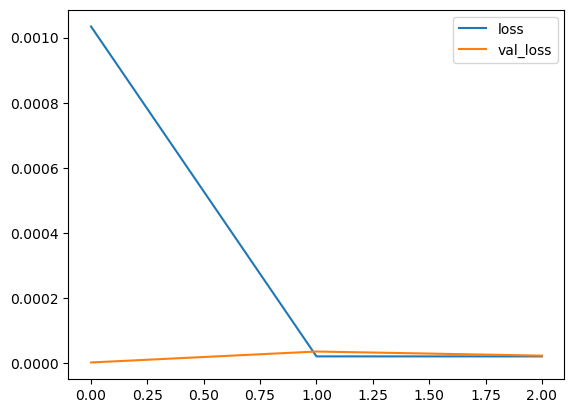

In [97]:
losses.plot()

## Evaluate on Test Data

In [98]:
first_eval_batch = scaled_train[-length:]

In [99]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

In [100]:
model.predict(first_eval_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


array([[0.5184701]], dtype=float32)

In [101]:
scaled_test[0]

array([0.51689476])

Now let's put this logic in a for loop to predict into the future for the entire test range.

----

**NOTE: PAY CLOSE ATTENTION HERE TO WHAT IS BEING OUTPUTED AND IN WHAT DIMENSIONS. ADD YOUR OWN PRINT() STATEMENTS TO SEE WHAT IS TRULY GOING ON!!**

In [102]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11

## Inverse Transformations and Compare

In [103]:
true_predictions = scaler.inverse_transform(test_predictions)

In [104]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

C:\Users\jepar\AppData\Local\Temp\ipykernel_16800\1339453577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [112]:
test.close.median()

0.00014555060952803345

In [105]:
t

,close,Predictions
date,,
2025-04-01 15:12:00-04:00,0.000309,0.000789
2025-04-01 15:13:00-04:00,0.000086,0.000838
2025-04-01 15:14:00-04:00,0.000361,0.000886
2025-04-01 15:15:00-04:00,0.000995,0.000932
2025-04-01 15:16:00-04:00,0.000600,0.000974
2025-04-01 15:17:00-04:00,0.000051,0.001015
2025-04-01 15:18:00-04:00,-0.001080,0.001052
2025-04-01 15:19:00-04:00,0.000275,0.001088
2025-04-01 15:20:00-04:00,0.000806,0.001122


<Axes: xlabel='date'>

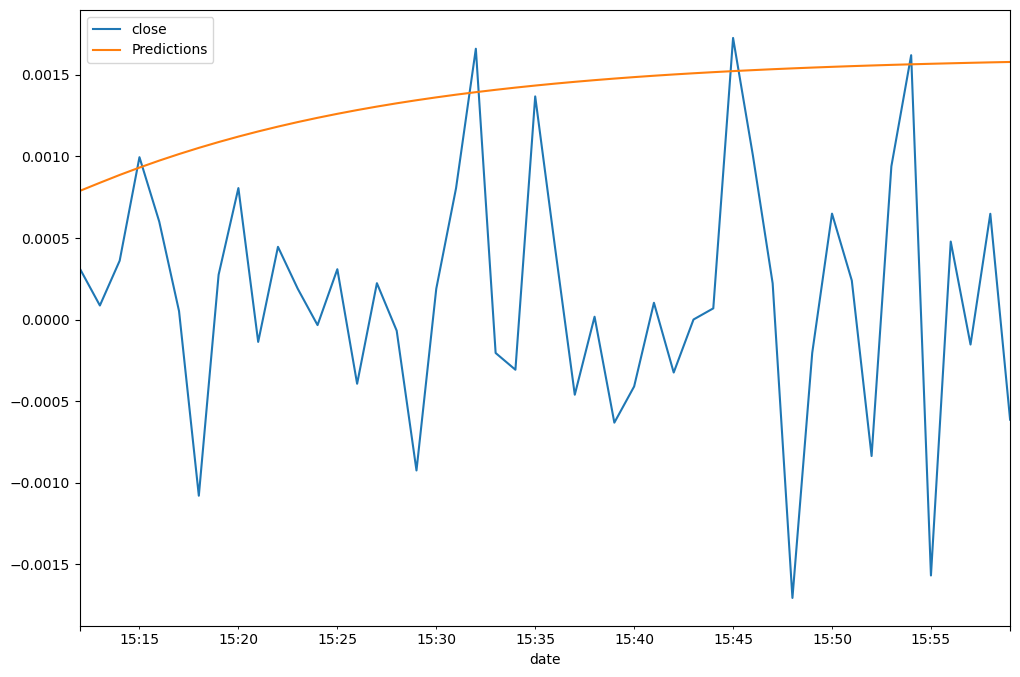

In [106]:
test.plot(figsize=(12,8))

# Retrain and Forecasting

In [46]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

TypeError: float() argument must be a string or a real number, not 'Timestamp'

In [ ]:
length = 12 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [ ]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


# fit model
model.fit_generator(generator,epochs=8)

In [ ]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
forecast = scaler.inverse_transform(forecast)

### Creating new timestamp index with pandas.

In [ ]:
df

In [ ]:
forecast_index = pd.date_range(start='2019-11-01',periods=periods,freq='MS')

In [ ]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,
                           columns=['Forecast'])

In [ ]:
forecast_df

In [ ]:
df.plot()
forecast_df.plot()

### Joining pandas plots

https://stackoverflow.com/questions/13872533/plot-different-dataframes-in-the-same-figure

In [ ]:
ax = df.plot()
forecast_df.plot(ax=ax)

In [ ]:
ax = df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2018-01-01','2020-12-01')

# Great Job!